# 1. Quantum cryptography.

Write a Qiskit code that implements BB84 with 15 qubits. You will play Alice.

(a) First use the local simulator qasm simulator to play Bob. State clearly the value
of the one-time pad that you got.

(b) Second, use the real device ibmq 16 melbourne to play Bob. Again, clearly state
the one-time pad that you got.

In [1]:
#initialize ibmq stuff
import numpy as np
import math
import random
from qiskit import(QuantumCircuit, execute, Aer, IBMQ)
from qiskit.visualization import plot_histogram
from qiskit.visualization import(plot_bloch_vector, plot_bloch_multivector)
from qiskit.quantum_info import state_fidelity
provider = IBMQ.load_account()
simulator = Aer.get_backend('qasm_simulator') #set backend for simulator
melbourne = provider.get_backend('ibmq_16_melbourne') #set backend for real machine (Melbourne QC)
burlington = provider.get_backend('ibmq_burlington') #london real machine
yorktown = provider.get_backend('ibmq_5_yorktown')
statevec = Aer.get_backend('statevector_simulator')

1)

In [2]:
#create lists of tuples (type, state) for Alice's and Bob's strings.
#type: 0=type-H, 1=type-1; state: 0=0, 1=1
n = 15  #number of qubits; one-time pad will be ~n/2 qubits long.
A = []
B = []
for i in range(n):
    ta = (random.randint(0,1), random.randint(0,1))
    A.append(ta)
    tb = (random.randint(0,1), 0)
    B.append(tb)
#print("A: ", A)
#print("B: ", B)

In [3]:
def bb84(backend):
    pad.clear() #clear the previous pad
    #send Alice's qubits, set state accordingly
    for i in range(n):
        #initialize circuit
        circ1 = QuantumCircuit(2,1)
        #set to specified state. 
        #if state = |1>, rotate around x axis 180deg 
        if A[i][1] == 1:
            circ1.rx(math.pi, 0)
        #if type H, apply H gate (rotate polarization 45deg)
        if A[i][0] == 0:
            circ1.h(0)
        #if Bob chose type H, apply H gate to measure in H basis
        if B[i][0] == 0:
            circ1.h(0)
        #bob(computer) measures, stores in classical bit
        circ1.measure(0,0) 
    
        #run the circuit, with one shot/qubit
        job = execute(circ1, backend, shots=1)
        result=job.result()
        counts=result.get_counts(circ1) #note: count is a dictionary
        #store measured state in B[i]. 
        #If type of Alice and Bob don't match, it doesn't matter, so just store 1
        if counts.get('0') == 1:
            B[i] = (B[i][0], 0) 
        else:
            B[i] = (B[i][0], 1)
        #check if Alice and Bob have same type. If so, add the bit to the pad
        if A[i][0] == B[i][0]:
            pad.append(B[i][1]) 
    return pad

In [4]:
pad = []
print("1a) Using the qasm simualtor, the one-time pad is:", bb84(simulator), "with length",len(pad))
print("1b) Using the Melbourne real machine, the one-time pad is:", bb84(yorktown), "with length", len(pad))
print("The Melbourne pad is not always accurate due to noise in the machine. However, error cannot be reduced by sending more than one shot as it would no longer be secure.")
print("Alice's qubits(type, state):", A)
print("Bob's qubits(type, state) after measuring:", B)
print("note: '0' is H-type, '1' is 1-type.")

1a) Using the qasm simualtor, the one-time pad is: [0, 1, 0, 0, 1, 1, 1, 0] with length 8
1b) Using the Melbourne real machine, the one-time pad is: [0, 1, 0, 0, 1, 0, 1, 0] with length 8
The Melbourne pad is not always accurate due to noise in the machine. However, error cannot be reduced by sending more than one shot as it would no longer be secure.
Alice's qubits(type, state): [(0, 0), (1, 0), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (1, 0), (0, 0)]
Bob's qubits(type, state) after measuring: [(1, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 1), (0, 0), (0, 1), (1, 1), (0, 0), (1, 0), (1, 0), (0, 1), (1, 0), (1, 1)]
note: '0' is H-type, '1' is 1-type.


# 2. Quantum Cloning

(a) Design a quantum circuit that clones the states $|+>$ and $|->$. I.e., design a unitary
U that achieves the following:

$U(|+>|0>) = |+>|+>$

$U(|−>|0>) = |−>|−>$

(b) Apply this U to |0> and |1>. Evaluate the “cloning fidelity” by computing

$F_ψ = {|<ψ|<ψ|U(|ψ>|0>)|}^2$

with the qasm simulator, for $|ψ> = |0>$ and $|ψ> = |1>$. How good is the cloning?

2a)

Given q0 = {|+>, |->}, the unitary U is:


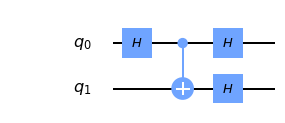

In [5]:
print("Given q0 = {|+>, |->}, the unitary U is:")
circ2 = QuantumCircuit(2)
circ2.h(0)
circ2.cx(0,1)
circ2.h(0)
circ2.h(1)
circ2.draw(output='mpl')

In [6]:
print("Prove with |+>:")
circ2 = QuantumCircuit(2)
#set q0 to |+>
circ2.ry(math.pi/2, 0)
#apply U
circ2.h(0)
circ2.cx(0,1)
circ2.h(0)
circ2.h(1)
#print states
job = execute(circ2, statevec)
result = job.result()
outputstate = result.get_statevector(circ2, decimals=3)
print("U(|+>|0>) = ",outputstate)

plusstate = [
    1/2 * complex(1,0),
    1/2 * complex(1,0),
    1/2 * complex(1,0),
    1/2 * complex(1,0)
]
print("  |+>|+> =  ",plusstate)
print("Fidelity of U(|+>|0>) and |+>|+> is",state_fidelity(outputstate, plusstate), "so the states are equal.")

Prove with |+>:
U(|+>|0>) =  [0.5+0.j 0.5-0.j 0.5-0.j 0.5+0.j]
  |+>|+> =   [(0.5+0j), (0.5+0j), (0.5+0j), (0.5+0j)]
Fidelity of U(|+>|0>) and |+>|+> is 1.0 so the states are equal.


In [7]:
print("Prove with |->:")
circ2 = QuantumCircuit(2)
#set q0 to |->
circ2.ry(-math.pi/2, 0)
#apply U
circ2.h(0)
circ2.cx(0,1)
circ2.h(0)
circ2.h(1)
#print states
job = execute(circ2, statevec)
result = job.result()
outputstate = result.get_statevector(circ2, decimals=4)
print("U(|->|0>) = ",outputstate)

minusstate = [
    1/2 * complex(1,0),
    -1/2 * complex(1,0),
    -1/2 * complex(1,0),
    1/2 * complex(1,0)
]
print("  |->|-> =  ",minusstate)
print("Fidelity of U(|->|0>) and |->|-> is",state_fidelity(outputstate, minusstate), "so the states are equal.")

Prove with |->:
U(|->|0>) =  [ 0.5-0.j -0.5+0.j -0.5+0.j  0.5-0.j]
  |->|-> =   [(0.5+0j), (-0.5+0j), (-0.5+0j), (0.5+0j)]
Fidelity of U(|->|0>) and |->|-> is 1.0 so the states are equal.


2b)

In [8]:
circ2 = QuantumCircuit(2)
#apply U
circ2.h(0)
circ2.cx(0,1)
circ2.h(0)
circ2.h(1)
#print states
job = execute(circ2, statevec)
result = job.result()
outputstate = result.get_statevector(circ2, decimals=4)
print("U(|0>|0>) =", outputstate)

zerostate = [
    1 * complex(1,0),
    0,
    0,
    0
]
print("  |0>|0> =  ",zerostate)
print("Fidelity of U(|0>|0>) and |0>|0> is %.4f so the states are NOT equal" %state_fidelity(outputstate, zerostate))

U(|0>|0>) = [0.7071-0.j 0.    +0.j 0.    +0.j 0.7071-0.j]
  |0>|0> =   [(1+0j), 0, 0, 0]
Fidelity of U(|0>|0>) and |0>|0> is 0.5000 so the states are NOT equal


In [8]:
circ2 = QuantumCircuit(2)
#set q0 = |1>
circ2.x(0)
#apply U
circ2.h(0)
circ2.cx(0,1)
circ2.h(0)
circ2.h(1)
#print states
job = execute(circ2, statevec)
result = job.result()
outputstate = result.get_statevector(circ2, decimals=4)
print("U(|1>|0>) =", outputstate)

onestate = [
    0,
    0,
    0,
    1 * complex(1,0)
]
print("  |1>|1> =  ",onestate)
print("Fidelity of U(|1>|0>) and |1>|1> is %.4f so the states are NOT equal" %state_fidelity(outputstate, onestate))

U(|1>|0>) = [0.    +0.j 0.7071-0.j 0.7071-0.j 0.    +0.j]
  |1>|1> =   [0, 0, 0, (1+0j)]
Fidelity of U(|1>|0>) and |1>|1> is 0.0000 so the states are NOT equal


When U is applied to the states $|\psi> = |+>, |->$, it effectively clones the states because the first Hadamard gate acting on $|\psi>$ puts it into the computational basis, so that the CNOT gate is only applied when $|\psi> = |->$.

However, when U is applied to the states $|\psi> = |0>, |1>$ it is no longer effective. This is because applying the first Hadamard gate to $|\psi>$ puts it into a superposition ($1/\sqrt(2) (|0> +/- |1>)$), which causes the CNOT gate to entangle the two qubits.

# 3. One-qubit tomography

Write the three circuits necessary to measure the projections of the state
$|\psi> = cos(\pi/8)|0> + sin(\pi/8)|1>$
along the x, y, and z axes of the Bloch sphere. Do this for the simulator and for a real
device using 1000 shots. Use the function plot_bloch_vector([px,py,pz]) to display the
Bloch vectors. How do they compare?

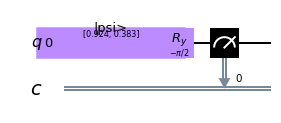

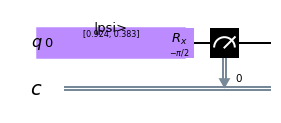

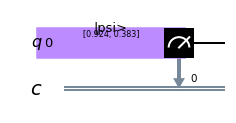

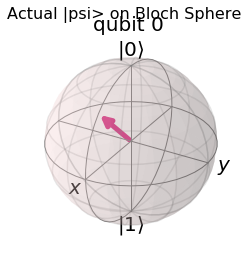

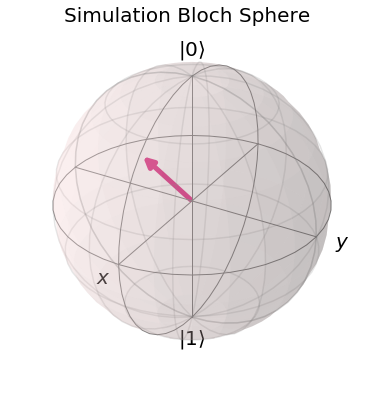

Simulation bloch sphere vector: 0.7060 x, 0.0140 y, 0.7140 z


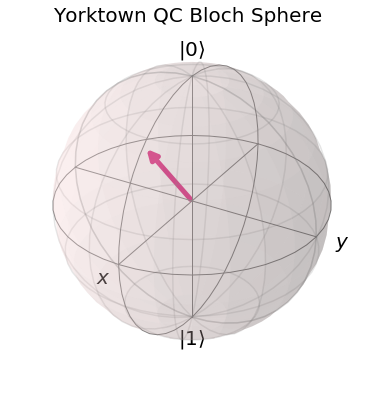

IBMQ bloch sphere vector: 0.6020x -0.0200y 0.7140z


In [11]:
#define state
psi = [
    math.cos(math.pi/8) * complex(1,0),
    math.sin(math.pi/8) * complex(1,0)
]
bloch_vecs = []
qbloch_vecs = []
bloch_counts = []
bloch_probs = []
i = 0

#circuit to measure x axis projection (think: I want what pointed at |0> to now point at |+>, not change basis of psi!)
circ3x = QuantumCircuit(1,1)
circ3x.initialize(psi,0)
circ3x.ry(-math.pi/2, 0)
circ3x.measure(0,0)

#circuit to measure y axis projection (want |0> to now point in direction of |+i>)
circ3y = QuantumCircuit(1,1)
circ3y.initialize(psi,0)
circ3y.rx(-math.pi/2, 0)
circ3y.measure(0,0)

#circuit to measure z axis projection
circ3z = QuantumCircuit(1,1)
circ3z.initialize(psi,0)
circ3z.measure(0,0)

#get projection of psi for each axis, store counts, get probability, get bloch vector component 
for circ in [circ3x, circ3y, circ3z]:
    job = execute(circ, simulator, shots=1000)
    result=job.result()
    counts=result.get_counts(circ) #note: count is a dictionary
    bloch_probs.append((counts.get('0')/1000, counts.get('1')/1000))
    bloch_vecs.append(bloch_probs[i][0]-bloch_probs[i][1])
    i=i+1
    
#do the same for real machine
for circ in [circ3x, circ3y, circ3z]:
    job = execute(circ, yorktown, shots=1000)
    display(circ.draw(output='mpl'))
    result=job.result()
    counts=result.get_counts(circ) #note: count is a dictionary
    bloch_probs.append((counts.get('0')/1000, counts.get('1')/1000))
    qbloch_vecs.append(bloch_probs[i][0]-bloch_probs[i][1])
    i=i+1

display(plot_bloch_multivector(psi, title='Actual |psi> on Bloch Sphere'))
display(plot_bloch_vector(bloch_vecs, title='Simulation Bloch Sphere'))
print("Simulation bloch sphere vector: %.4f x, %.4f y, %.4f z" %(bloch_vecs[0], bloch_vecs[1], bloch_vecs[2]))
display(plot_bloch_vector(qbloch_vecs, title='Yorktown QC Bloch Sphere', color=blue))
print("IBMQ bloch sphere vector: %.4fx %.4fy %.4fz" %(qbloch_vecs[0], qbloch_vecs[1], qbloch_vecs[2]))

In [14]:
print("Percent difference between simulation and QC:")
perdiff = []
comp = ['x', 'y', 'z']
for i in range(3):
    t = (abs(bloch_vecs[i] - qbloch_vecs[i])/((abs(bloch_vecs[i]) + abs(qbloch_vecs[i])/2)))
    perdiff.append(t)
    print("%s component percent difference is %4f" %(comp[i], t*100))
    
print("Since |psi> has no imaginary component, the y component on the bloch sphere should be zero. This means any y components measured are results of noise (in both the simulation and real machine). This may be an explanation for the large percent difference in the y component. ")

Percent difference between simulation and QC:
x component percent difference is 10.327706
y component percent difference is 141.666667
z component percent difference is 0.000000
Since |psi> has no imaginary component, the y component on the bloch sphere should be zero. This means any y components measured are results of noise (in both the simulation and real machine). This may be an explanation for the large percent difference in the y component. 


# 4. Error correction with the three-qubit bit-flip code

The circuit shown below
is the “automated” version of the three-qubit bit-flip error correction code described
in class. The last five gates – Two CNOTS and three Toffolis – perform the same
“correction protocol” achieved by the conditional measurement operations shown in
class. The final state |Φ> of the ancillas remains |00> if no error happens, and becomes
|10>, |11>, |01> when one of the qubits 2, 1, 0 flips, respectively. If another round of
error correction is needed the ancilla state |Φ> must be reset to |00> (currently not
allowed in real IBM-Q devices).

a) Implement this algorithm for $|ψ_{in}> = 1/\sqrt(2)(|000> + |111>)$
in the simulator and check that it works by intentionally flipping each one of the
three qubits in $||ψ_{in}>$ before the error correction procedure. Measure $|ψ_{out}>$ in the
computational basis and check that you get close to 50% probability for 000 and
111.

b)  Run the same circuit in a real device (no need to add the intentional flips!), and
measure $|ψ_{out}>$. How good is it?

In [15]:
def correction(backend, flip):
    circ4 = QuantumCircuit(5, 5)
    #build |psi>
    circ4.h(2)
    circ4.cx(2,3)
    circ4.cx(2,4)
    #flip bits in |psi>
    if(flip != None):
        circ4.x(flip)
    #diagnosis
    circ4.cx(2,0)
    circ4.cx(3,0)
    circ4.cx(3,1)
    circ4.cx(4,1)
    #correction
    circ4.cx(0,2)
    circ4.cx(1,4)
    circ4.ccx(0,1,2)
    circ4.ccx(0,1,3)
    circ4.ccx(0,1,4)
    #measure
    circ4.measure([0,1,2,3,4],[0,1,2,3,4])
    
    job = execute(circ4, backend, shots=1000)
    result=job.result()
    counts=result.get_counts(circ4)
    return counts, circ4 #returns tuple, [0]=counts, [1]=quantum circuit
    


4a) Implementing the error correction algorithm with the simulator. The final states can be read from beneath the histograms: $|\Phi>$ is the right 2 qubits, and $|\psi_{out}>$ is the left 3 qubits

The circuit for the error correction algorithm, with |psi_in> = 1/sqrt(2)(|000> + |111>):


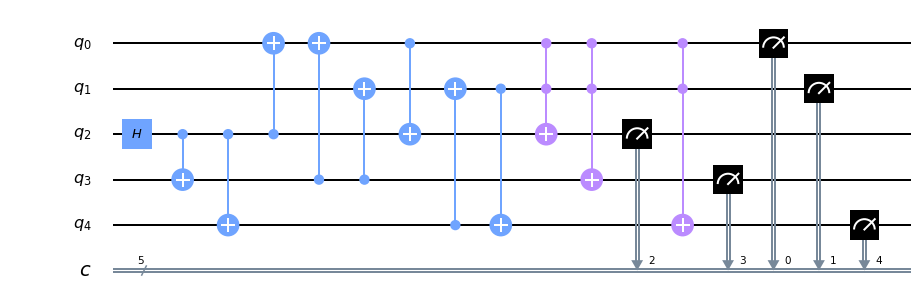

    When no qubits in |Phi> are flipped, the counts are: {'00000': 483, '11100': 517}
From the states measured, |psi_out>=|psi_in>, and |Phi>=|00>, which means there was no error
    When qubit 1 in |Phi> is flipped, the counts are: {'00001': 467, '11101': 533}
From the states measured, |psi_out> = 1/sqrt(2)(|000> + |111>) = |psi_in>, and |Phi> corresponds to it's expected state.
    When qubit 2 in |Phi> is flipped, the counts are: {'11111': 545, '00011': 455}
From the states measured, |psi_out> = 1/sqrt(2)(|000> + |111>) = |psi_in>, and |Phi> corresponds to it's expected state.
    When qubit 3 in |Phi> is flipped, the counts are: {'11110': 507, '00010': 493}
From the states measured, |psi_out> = 1/sqrt(2)(|000> + |111>) = |psi_in>, and |Phi> corresponds to it's expected state.


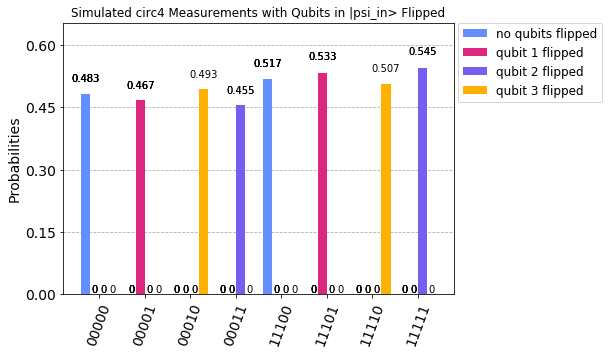

Error counts for simulation: [{'00000': 483, '11100': 517}, {'00001': 467, '11101': 533}, {'11111': 545, '00011': 455}, {'11110': 507, '00010': 493}]


In [18]:
sim_error=[] #list to store counts
#no error
no_error = correction(simulator, None)
print("The circuit for the error correction algorithm, with |psi_in> = 1/sqrt(2)(|000> + |111>):")
display(no_error[1].draw(output='mpl'))
#display(plot_histogram(no_error[0], title='Measurement of circ4 With No Flipped Qubits'))
print("    When no qubits in |Phi> are flipped, the counts are:", no_error[0])
print("From the states measured, |psi_out>=|psi_in>, and |Phi>=|00>, which means there was no error")
sim_error.append(no_error[0])
#flipping qubits 2,3,4 (the three qubits in psi)
for i in range(1, 4):
    tempcount = correction(simulator, i+1)[0]
    tempcirc = correction(simulator, i+1)[1]
    sim_error.append(tempcount)
    #display(plot_histogram(sim_error[i], title='Measurement of circ4 With Qubit %d In |psi_in> Flipped'%i))
    print("    When qubit %d in |Phi> is flipped, the counts are: %s" %(i, sim_error[i]))
    print("From the states measured, |psi_out> = 1/sqrt(2)(|000> + |111>) = |psi_in>, and |Phi> corresponds to it's expected state.")
legend = ['no qubits flipped', 'qubit 1 flipped', 'qubit 2 flipped', 'qubit 3 flipped']
display(plot_histogram(sim_error, title='Simulated circ4 Measurements with Qubits in |psi_in> Flipped', legend=legend)) 
print("Error counts for simulation:",sim_error)

4b) Implementing with Yorktown QC

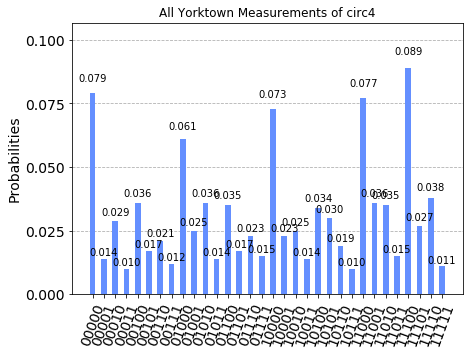

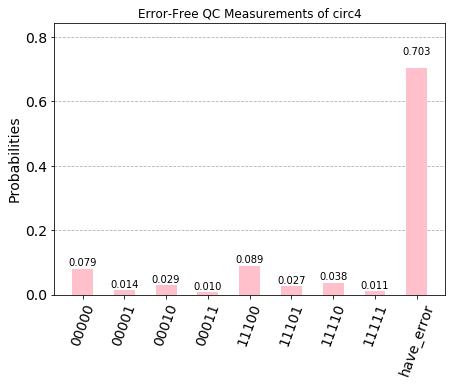

The counts for error-free measurements: {'11100': 89, '00000': 79, '00001': 14, '11101': 27, '00011': 10, '11111': 11, '00010': 29, '11110': 38, 'have_error': 703}
Total error-free measurements: 297
This is a significant decrease from the simulation.


In [19]:
real_error = correction(yorktown, None)
data = real_error[0]
data2= {'11100': 0, '00000': 0, '00001': 0, '11101': 0, '00011': 0, '11111': 0, '00010': 0, '11110': 0}
num_corrected = 0
for i in data:
    if i in data2:
        data2[i] = data.get(i)
        num_corrected = num_corrected + data.get(i)
data2['have_error']= 1000-num_corrected
display(plot_histogram(data, title='All Yorktown Measurements of circ4'))
display(plot_histogram(data2, title='Error-Free QC Measurements of circ4', color='pink'))
print("The counts for error-free measurements:", data2)
print("Total error-free measurements:", num_corrected)
print("This is a significant decrease from the simulation.")

4c) Implementing without correction gates

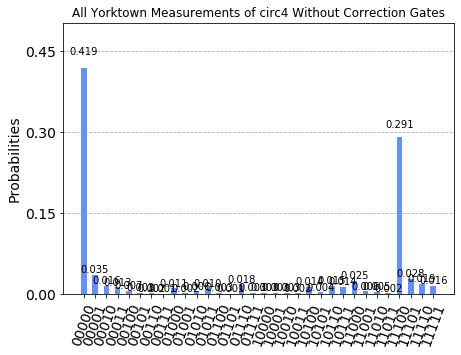

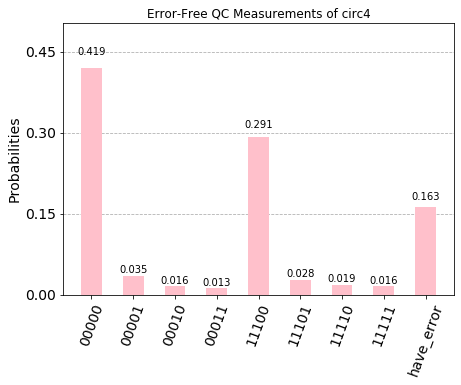

The counts for error-free measurements: {'11100': 291, '00000': 419, '00001': 35, '11101': 28, '00011': 13, '11111': 16, '00010': 16, '11110': 19, 'have_error': 163}
Total error-free measurements: 837


In [20]:
circ4c = QuantumCircuit(5,5)
#build |psi>
circ4c.h(2)
circ4c.cx(2,3)
circ4c.cx(2,4)
#diagnosis
circ4c.cx(2,0)
circ4c.cx(3,0)
circ4c.cx(3,1)
circ4c.cx(4,1)
#measure
circ4c.measure([0,1,2,3,4],[0,1,2,3,4])
    
job = execute(circ4c, yorktown, shots=1000)
result=job.result()
counts=result.get_counts(circ4c)

no_error_c = {'11100': 0, '00000': 0, '00001': 0, '11101': 0, '00011': 0, '11111': 0, '00010': 0, '11110': 0}
num_corrected_c = 0
for i in counts:
    if i in no_error_c:
        no_error_c[i] = counts.get(i)
        num_corrected_c = num_corrected_c + counts.get(i)
no_error_c['have_error']= 1000-num_corrected_c

display(plot_histogram(counts, title='All Yorktown Measurements of circ4 Without Correction Gates'))
display(plot_histogram(no_error_c, title='Error-Free QC Measurements of circ4', color='pink'))
print("The counts for error-free measurements:", no_error_c)
print("Total error-free measurements:", num_corrected_c)

In [21]:
print("When executed on a real machine, the error correction algorithm (part b) had  ",num_corrected, "error-free measurements of |psi_out>.")
print("In comparison, the same algorithm (part c) without the correction gates had %d error-free measurements." %num_corrected_c)
print("This shows that the noise caused by the last 5 gates in (b) is much too loud to consider using this circuit for error correction.")

When executed on a real machine, the error correction algorithm (part b) had   297 error-free measurements of |psi_out>.
In comparison, the same algorithm (part c) without the correction gates had 837 error-free measurements.
This shows that the noise caused by the last 5 gates in (b) is much too loud to consider using this circuit for error correction.


# 5. Three-bit phase estimation

a) Implement the circuit below for U = Ry(θ) with θ/4π exactly represented by three
base-2 decimals, θ/4π = 0.j1j2j3 (your choice of j1j2j3). Note that θ/4π
is the associated phase φu for |u> = |−i>, since
$R_y(θ)|−i> = e^{+iθ/2} |−i> = e^{+2πi θ/4π} |−i>$

Input |ψ> = |−i>, and run the circuit in the simulator and a real device to compare.

b) Run the circuit again for θ/4π = 0.j1j2j3 − $\epsilon$, with $\epsilon$ small. If you run the circuit
many times does it return the 0.j1j2j3 closest to the correct answer θ/4π? How
does the real device compare to the simulator?

In [25]:
def phase_estimate(backend, theta):
    circ5 = QuantumCircuit(4,3)
    #set |psi> = |-i>
    circ5.rx(math.pi/2, 3)
    circ5.h([0,1,2])
    circ5.cry(theta, 0, 3)
    #(Ry(theta))^2 = Ry(2theta) :-)
    circ5.cry(2*theta, 1, 3)
    circ5.cry(4*theta, 2, 3)
    circ5.h([0,1,2])
    circ5.crx(-math.pi/4, 2, 0)
    circ5.crx(-math.pi/2, 1, 0)
    circ5.crx(-math.pi/2, 2, 1)
    circ5.measure([0,1,2], [0,1,2])
    
    job = execute(circ5, backend, shots=1000)
    result=job.result()
    counts=result.get_counts(circ5)
    display(circ5.draw(output='mpl'))
    return counts

    
    

5a) choose theta/4pi = pi/4pi = .250 = 0b.010


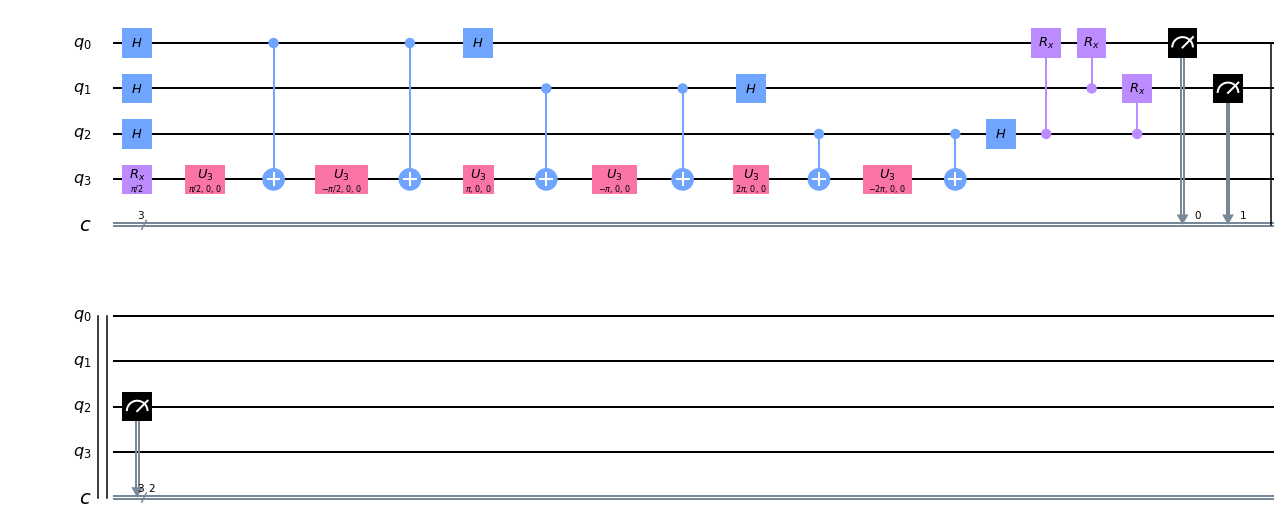

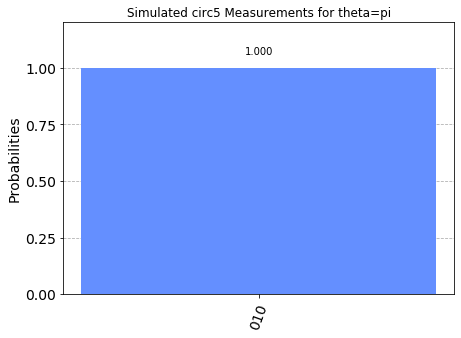

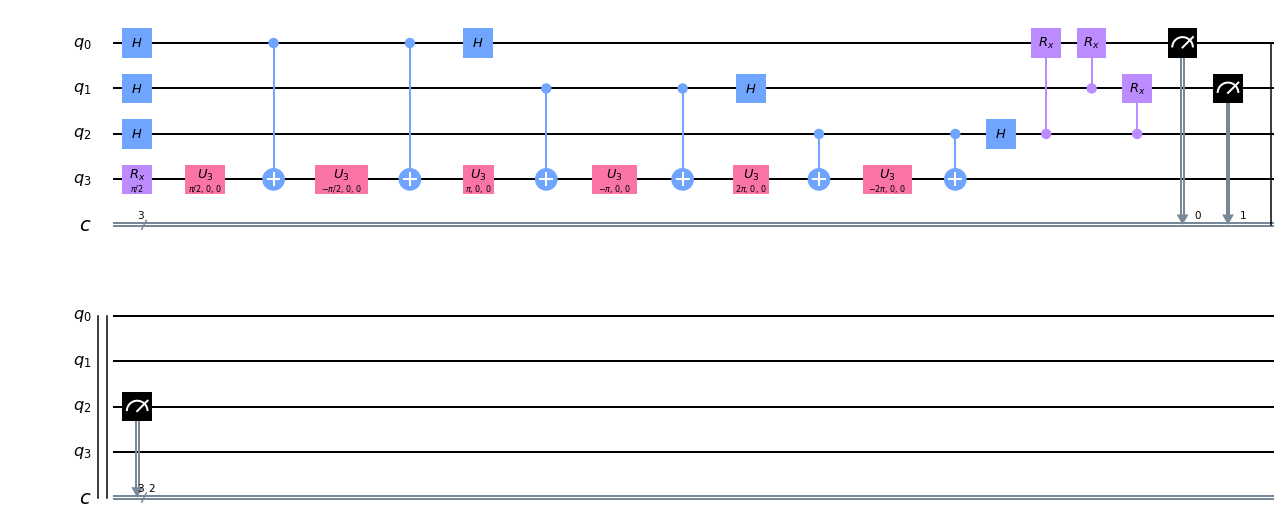

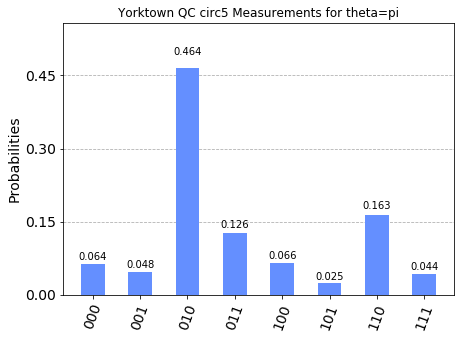

For the simulator, the measured values for qubits 0,1,2 was '010', which matches the values for j0=0, j1=1 j2=0.
For the QC, there was uncertainty due to noise in the machine, but the most common measured value for qubits 0,1,2 was '010', which also matches the values for j0=0, j1=1 j2=0.


In [26]:
print("5a) choose theta/4pi = pi/4pi = .250 = 0b.010")
j = [0,1,0]
theta0 = math.pi
sim_count = phase_estimate(simulator, theta0)
display(plot_histogram(sim_count, title='Simulated circ5 Measurements for theta=pi'))
qc_count = phase_estimate(yorktown, theta0)
display(plot_histogram(qc_count, title='Yorktown QC circ5 Measurements for theta=pi'))

print("For the simulator, the measured values for qubits 0,1,2 was '010', which matches the values for j0=%d, j1=%d j2=%d."%(j[0],j[1],j[2]))
print("For the QC, there was uncertainty due to noise in the machine, but the most common measured value for qubits 0,1,2 was '010', which also matches the values for j0=%d, j1=%d j2=%d."%(j[0],j[1],j[2]))


5b) choose theta/4pi = (4pi/5)/4pi = .20 = 0b00110011001


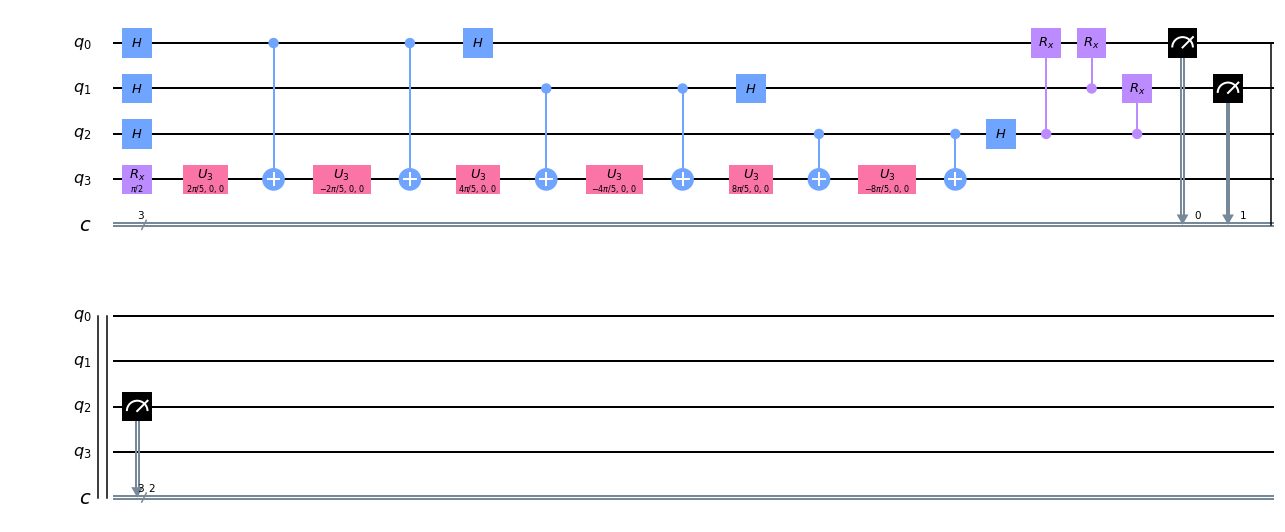

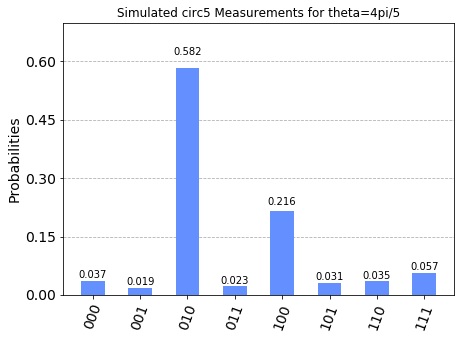

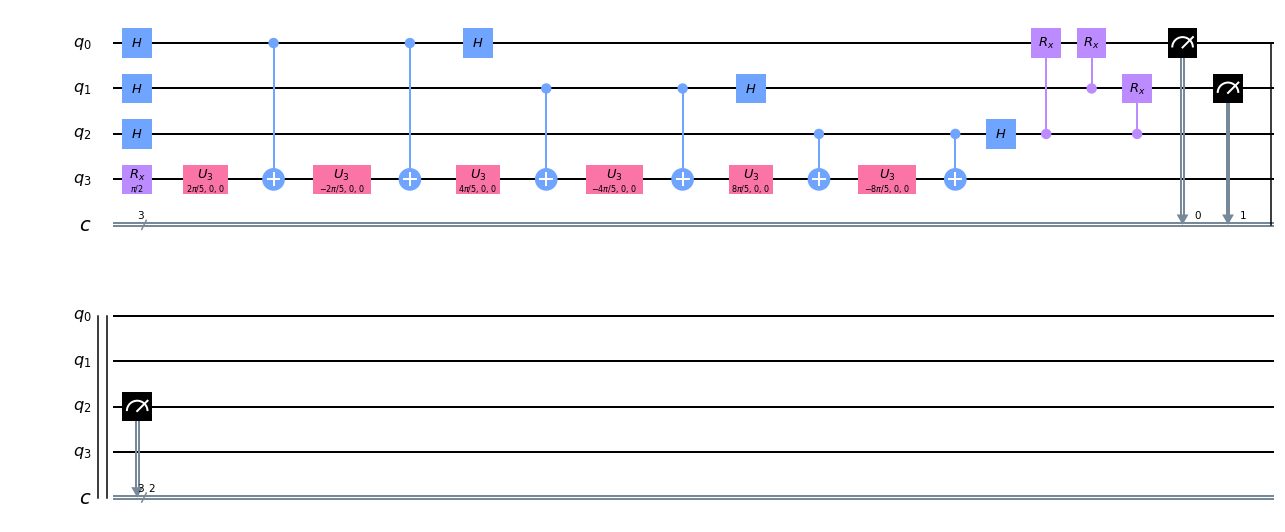

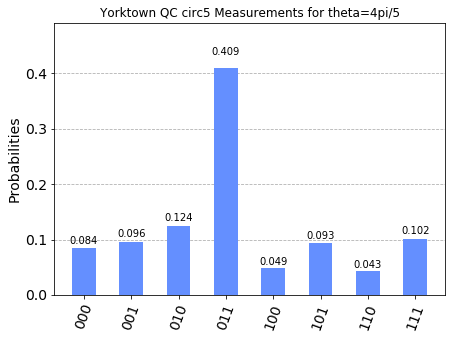

In [27]:
print("5b) choose theta/4pi = (4pi/5)/4pi = .20 = 0b00110011001")
j = [0,0,1,1,0,0,1,1,0,0,1]
theta1 = math.pi*4/5
sim_count = phase_estimate(simulator, theta1)
display(plot_histogram(sim_count, title='Simulated circ5 Measurements for theta=4pi/5'))
qc_count = phase_estimate(yorktown, theta1)
display(plot_histogram(qc_count, title='Yorktown QC circ5 Measurements for theta=4pi/5'))


In [28]:
print("Here, theta/4pi is not exactly represented by three binary digits, j=%s. The closest three-bit binary number is j~= '010'." %j)
print("With 1000 shots on both the simulator and the real machine, the most common measurement was of the state |010>, which relates to j=010, however the quantum computer was again much, much noisier.")

Here, theta/4pi is not exactly represented by three binary digits, j=[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]. The closest three-bit binary number is j~= '010'.
With 1000 shots on both the simulator and the real machine, the most common measurement was of the state |010>, which relates to j=010, however the quantum computer was again much, much noisier.
